#### Preliminaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.convolution import Gaussian2DKernel, convolve
import time
from scipy import signal
from skimage.measure import compare_ssim

#### Load image with filter centers

In [2]:
fttt2_im_no_center = np.load('fttt2_im_no_center.npy')

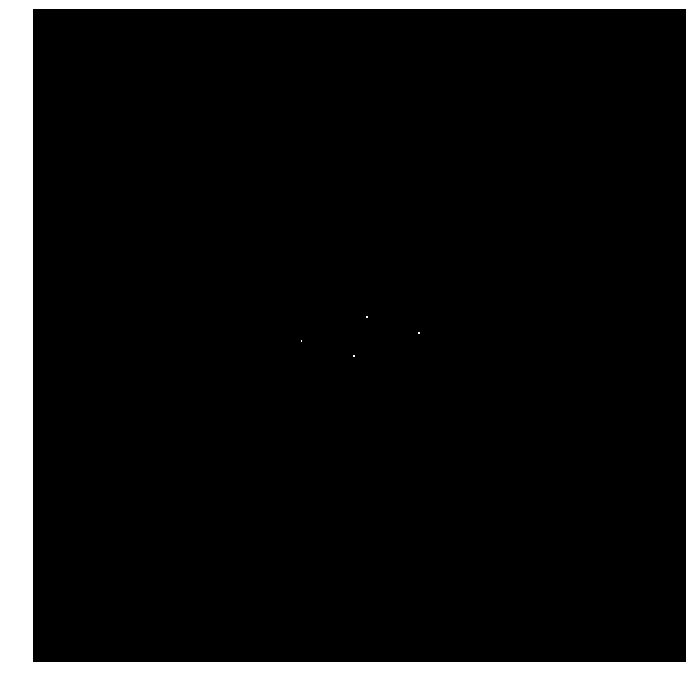

In [3]:
plt.figure(figsize=(12, 12))
plt.imshow(fttt2_im_no_center,  
           cmap='gray', interpolation = 'none'), plt.axis('off');

#### Compare `astropy` to `scipy`

- Create a set of increasingly larger gaussian kernels
- Convolve them to the image with filter centers using both libraries
- Time all the convolutions and store in two lists, one per library
- Compare the two lists

In [4]:
sizes = np.arange(1,25, 2)
spconv_time = []
apconv_time = []

In [5]:
sizes

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23])

In [6]:
for s in sizes:
    k = Gaussian2DKernel(s)

    # --- signal.fft convolve ---
    tstart = time.time()
    signal.fftconvolve(fttt2_im_no_center, k, mode='same')
    spconv_time.append(time.time() - tstart)

    # --- astropy convolve ---
    tstart = time.time()
    convolve(fttt2_im_no_center, k)
    apconv_time.append(time.time() - tstart)

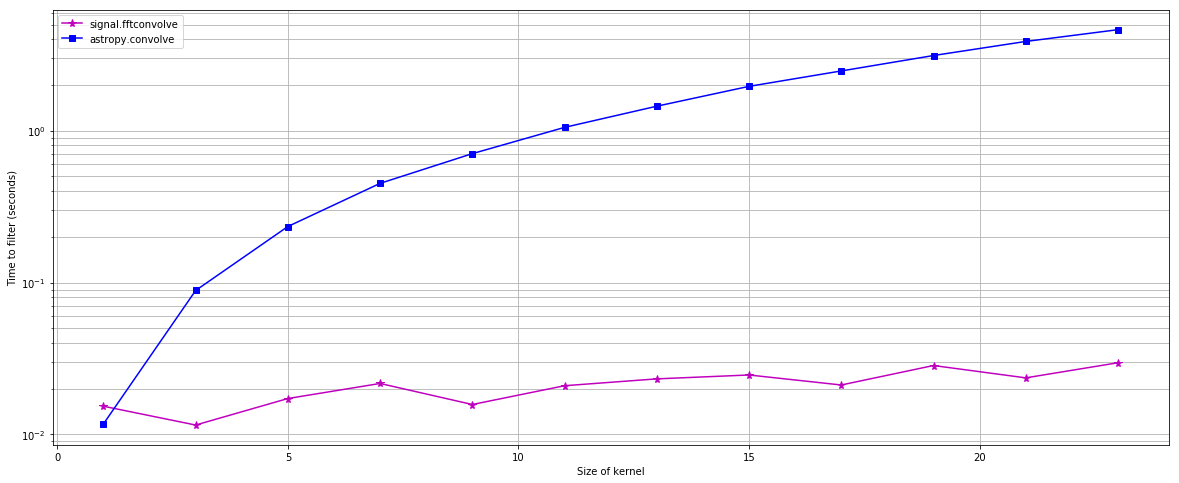

In [7]:
fig = plt.figure(1, figsize=(20, 8))
plt.semilogy(sizes, spconv_time, 'm-*', markersize=8, label='signal.fftconvolve')
plt.semilogy(sizes, apconv_time, 'b-s', label='astropy.convolve')
plt.xlabel('Size of kernel')
plt.ylabel('Time to filter (seconds)')
plt.grid(True, which="both")
plt.legend(loc='best');

#### Let's make sure we are really comparing apples to apples

Take a single kernel and compare the two convolved results

In [8]:
spt = (signal.fftconvolve(fttt2_im_no_center, Gaussian2DKernel(7), mode='same'))[100:-100,100:-100]
apt = (convolve(fttt2_im_no_center, Gaussian2DKernel(7)))[100:-100,100:-100]

Visual comparison

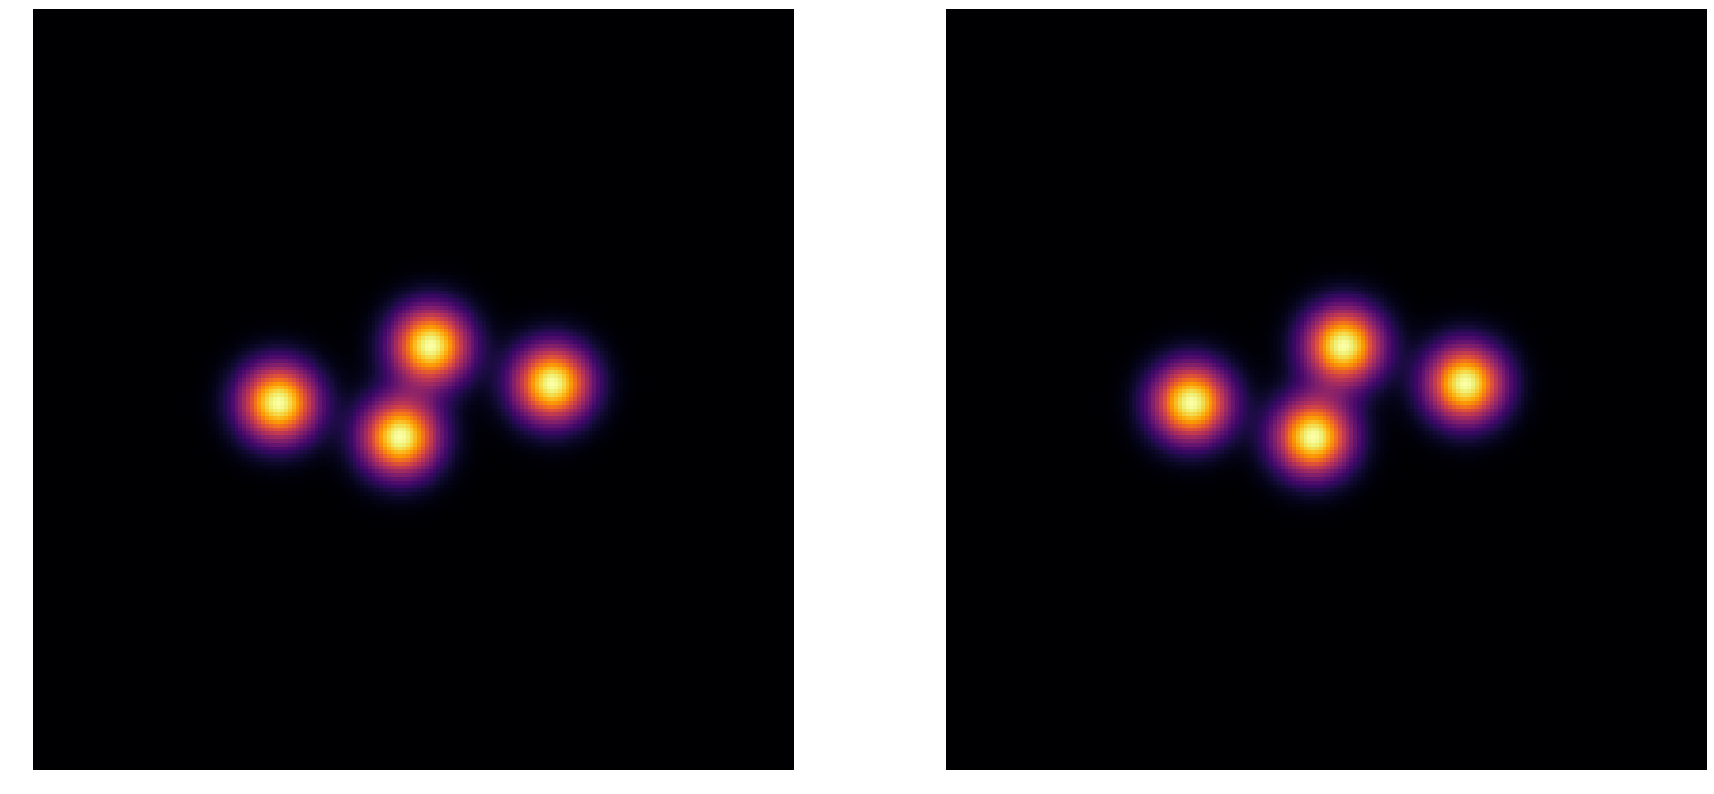

In [9]:
plt.figure(figsize=(30, 15))
plt.subplot(1, 2, 1)
plt.imshow(spt, cmap='inferno', interpolation = 'none'), plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(apt, cmap='inferno', interpolation = 'none'), plt.axis('off');

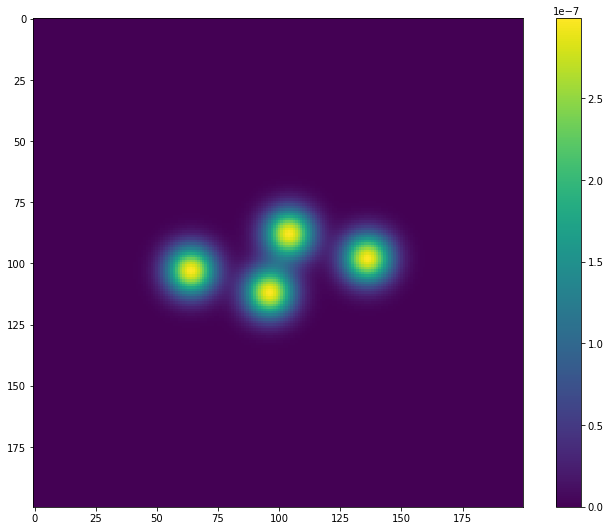

In [10]:
plt.figure(figsize=(12, 9))
plt.imshow(apt-spt, cmap='viridis', interpolation = 'none')
plt.colorbar();

Numerical comparison

In [11]:
compare_ssim(spt, apt)

0.9999999999965662